In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
def missing_values_table(df): 
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Valores ausentes', 1 : '% do valor total'})
    return mis_val_table_ren_columns.loc[(mis_val_table_ren_columns!=0).any(axis=1)]

In [3]:
#load data
df = pd.read_csv("data/train.csv")

## Scatter plot geral - validar se os dados se apresentam de forma esparça

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
#scatter_matrix(df, figsize=(20, 20), diagonal='kde')

## Avaliar quantidade de Missing Values

In [6]:
miss = missing_values_table(df)

In [7]:
miss = miss.sort_values(by=["Valores ausentes"], ascending=False)

In [8]:
miss

,Valores ausentes,% do valor total
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


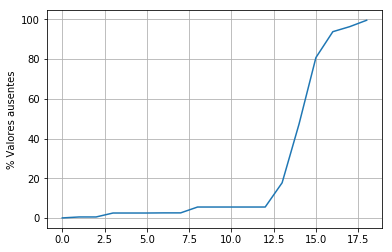

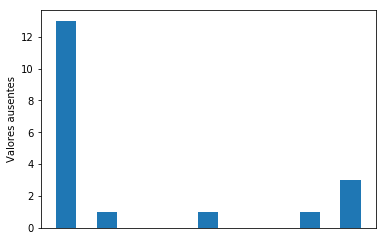

In [9]:
plt.plot(sorted(miss['% do valor total'].values))
plt.grid(True)
plt.ylabel("% Valores ausentes")
plt.show()
miss['Valores ausentes'].hist(bins=15, grid=False)
plt.ylabel("Valores ausentes")
plt.xticks([])
plt.show()

In [10]:
df[miss.index].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
FireplaceQu      object
LotFrontage     float64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
BsmtExposure     object
BsmtFinType2     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

De acordo com alguns estudos, estimar os Missing values em um conjunto de dados onde o valor ultrapassa 40%, existe uma grande chance de prejudicar o aprendizado.
Desse modo, os atributos abaixo cerca de 5, estão a partir de 47% até 99%. Sendo assim podemos partir por dois caminhos. Eliminar do conjunto de dados, ou estudar cada atributo e tentar substituir os valores ausentes por um valor que represente essa ausência.

Atributo  | Valores ausentes | % do valor total | Descrição
--- | --- | --- | ---
PoolQC  |	1453 |	`99.520` | Pool quality
MiscFeature  |	1406 |	`96.301` | Miscellaneous feature not covered in other categories
Alley  |	1369 |	`93.767` | Type of alley access
Fence  |	1179 |	80.753 | Fence quality
FireplaceQu  |	690 |	47.260 | Fireplace quality

Sendo assim, vou estudar os 5 atributos com o objetivo de substituir os valores ausentes.

In [11]:
for c in df[['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']].columns:
    print(c,df[c].unique())

PoolQC [nan 'Ex' 'Fa' 'Gd']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']
Alley [nan 'Grvl' 'Pave']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']


3 atributos estão relacionados a qualidade, 1 relacionado ao tipo de acesso e outro serve como 'outros', dessa forma os atributos que são relacionados a qualidade, apesar de categóricos, estão dentro de uma escala de distância. Os demais não possuem essa escala.

In [12]:
df.PoolQC.fillna('NtE', inplace=True)
df.Fence.fillna('NtE', inplace=True)
df.FireplaceQu.fillna('NtE', inplace=True)
df.MiscFeature.fillna('None', inplace=True)
df.Alley.fillna('None', inplace=True)

In [75]:
col_n = []
col_c = []
for c in miss.index:
    #print(c,df[c].dtypes,df[c].unique())
    if df[c].dtypes == 'object':
        col_c.append(c)
    else:
        col_n.append(c)

Para as os demais, existem outras abordagens como substituição por vizinhos mais próximos dentre outras, mas para esse experimento vou utilizar a substituição pelos valores médios ou moda

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputerN = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputerC = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [ ]:
imputerN = imputerN.fit(df[col_n])
df[col_n] = imputerN.transform(df[col_n])
imputerC = imputerC.fit(df[col_c])
df[col_c] = imputerC.transform(df[col_c])

## tratar os tipos object

In [67]:
df.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

In [74]:
for c in df.columns:
    if df[c].dtypes == 'object':
        print(c,df[c].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
Alley ['None' 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'Metal

Para os dados categóricos existem diversas abordagens, a mais comum é a conversão para pseudo-inteiros ou a one-hot.

In [76]:
for c in df.columns:
    if df[c].dtype.name == "object":
        df[c] = df[c].astype('category')

In [78]:
#conversao para pseudo atributos inteiros
for c in df.columns:
    if df[c].dtypes.name == 'category':
        df[c] = df[c].cat.codes

In [503]:
def pre_process(df):
    df.PoolQC.fillna('NtE', inplace=True)
    df.Fence.fillna('NtE', inplace=True)
    df.FireplaceQu.fillna('NtE', inplace=True)
    df.MiscFeature.fillna('None', inplace=True)
    df.Alley.fillna('None', inplace=True)
    
    miss = missing_values_table(df)
    
    col_n = []
    col_c = []
    for c in miss.index:
        #print(c,df[c].dtypes,df[c].unique())
        if df[c].dtypes == 'object':
            col_c.append(c)
        else:
            col_n.append(c)
            
    imputerN = SimpleImputer(missing_values = np.nan, strategy = 'mean')
    imputerC = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
    
    imputerN = imputerN.fit(df[col_n])
    df[col_n] = imputerN.transform(df[col_n])
    imputerC = imputerC.fit(df[col_c])
    df[col_c] = imputerC.transform(df[col_c])
    
    for c in df.columns:
        if df[c].dtype.name == "object":
            df[c] = df[c].astype('category')
            
    #conversao para pseudo atributos inteiros
    for c in df.columns:
        if df[c].dtypes.name == 'category':
            df[c] = df[c].cat.codes
    
    return df

## Visualização

In [85]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
import seaborn as sn

In [108]:
df2 = df[df.columns.difference(['SalePrice','Id'])].copy()

In [119]:
def pca_view(df2, n_components=4):
    pca = decomposition.PCA(n_components=n_components)
    pca.fit(df2)
    X = pca.transform(df2)
    print("Soma dos 3 primeiros componentes:",np.sum(pca.explained_variance_ratio_[0:3]))
    
    sn.barplot(list(range(1,len(pca.components_)+1)), 1*pca.explained_variance_ratio_)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), )
    plt.show()
    
    fig = plt.figure(1, figsize=(10, 10))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=18, azim=134)
    plt.cla()
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Componente Principal 1', fontsize = 15)
    ax.set_ylabel('Componente Principal 2', fontsize = 15)

    ax.scatter(X[:, 0], X[:, 1], s = 50)
    plt.show()
    
    return X

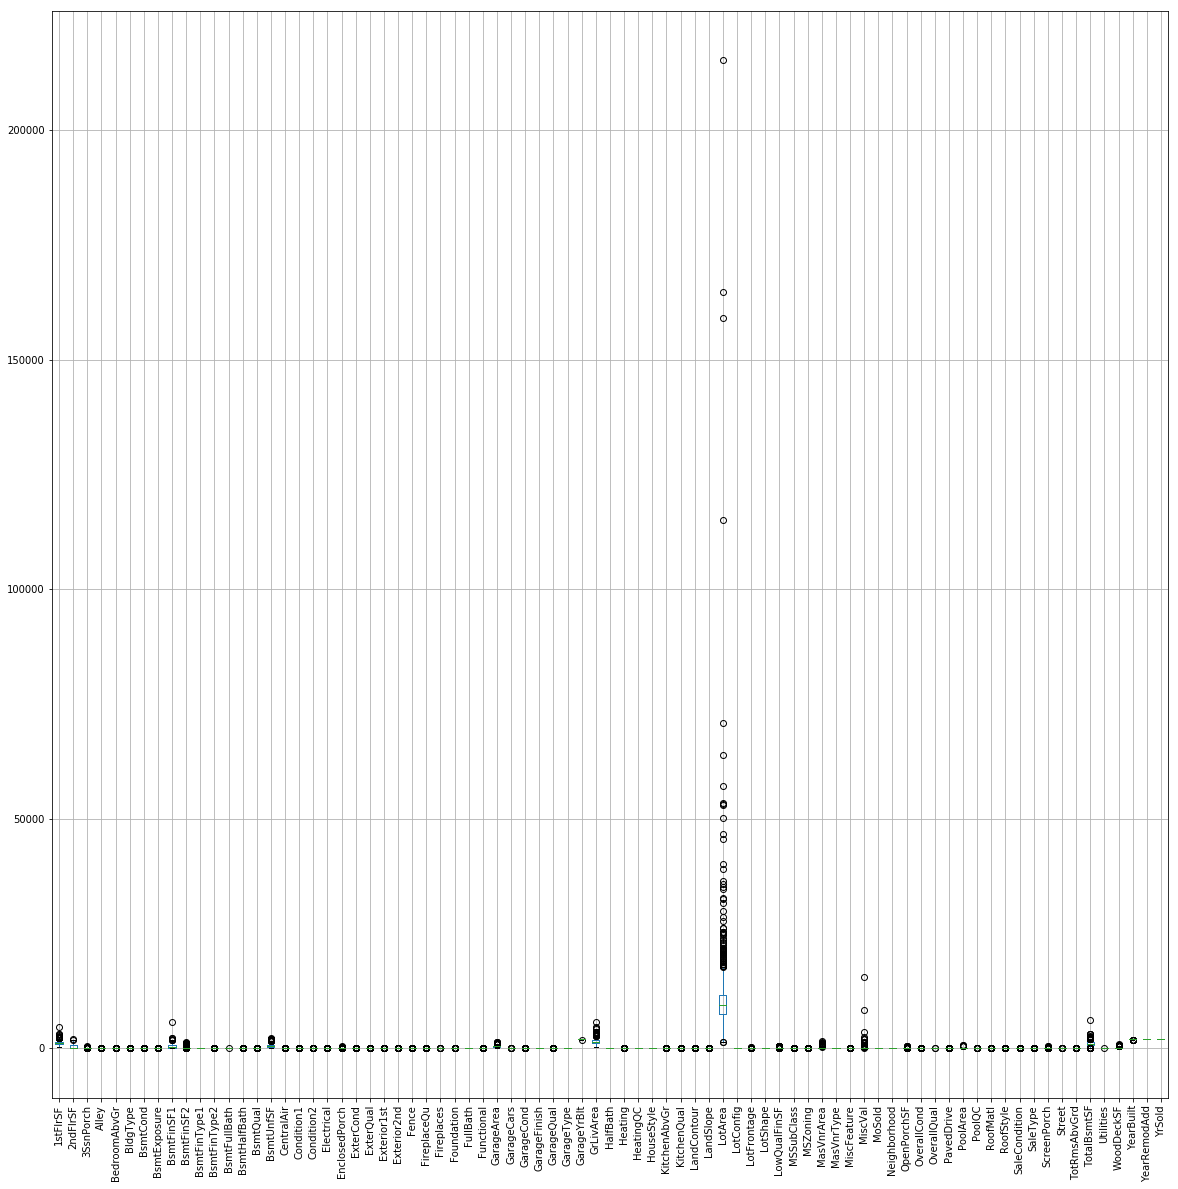

In [541]:
df2.boxplot(figsize=(20, 20), rot=90)

#### Em alguns atributos, é possível dectectar a presença de outiliers, nesse caso é necessário um pouco de atenção e verificar a necessidade de normalizar os dados.

In [114]:
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer, QuantileTransformer, MinMaxScaler

In [354]:
x_st = StandardScaler().fit_transform(df2)

C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Normalizados:
Soma dos 3 primeiros componentes: 0.23175233724521976


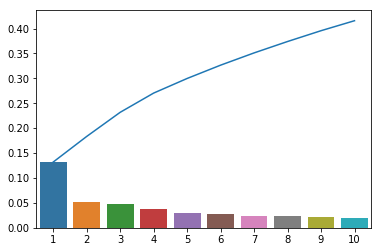

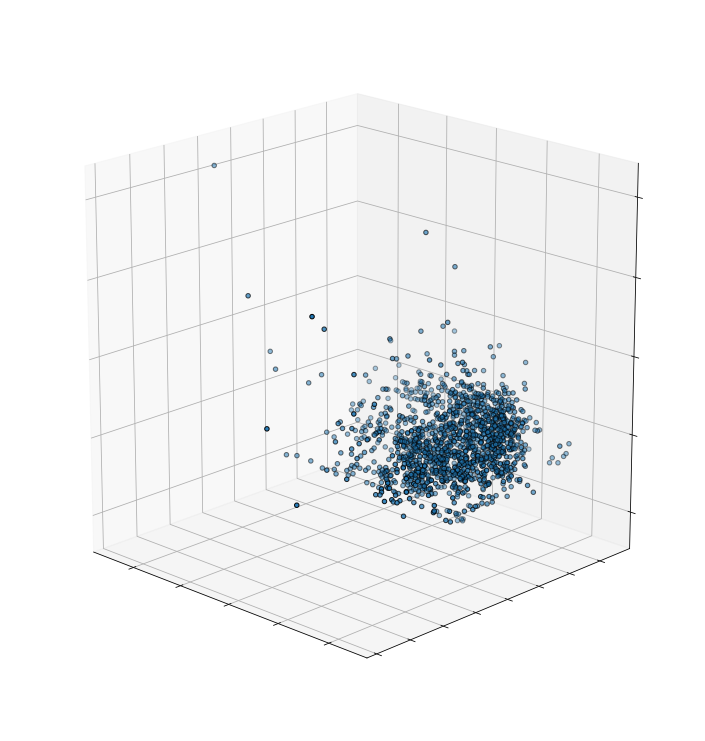

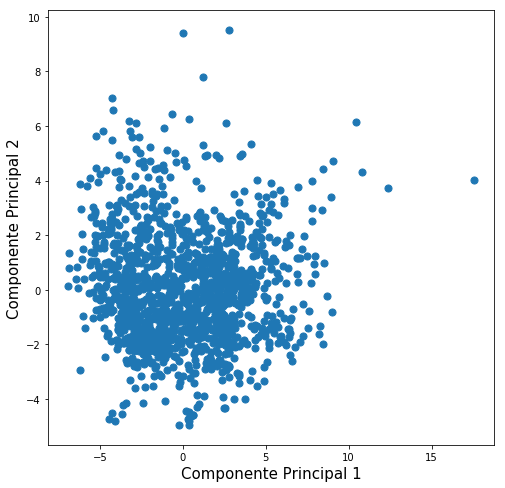

Dados originais:
Soma dos 3 primeiros componentes: 0.9931318049271429


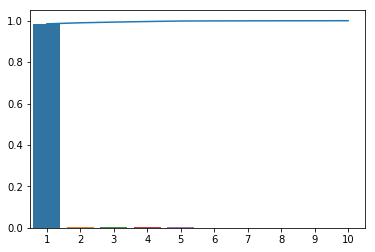

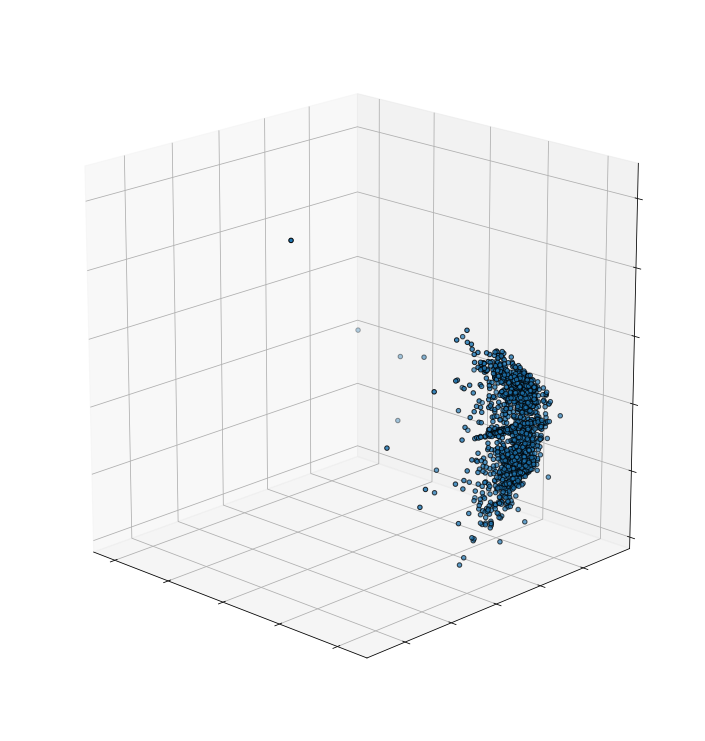

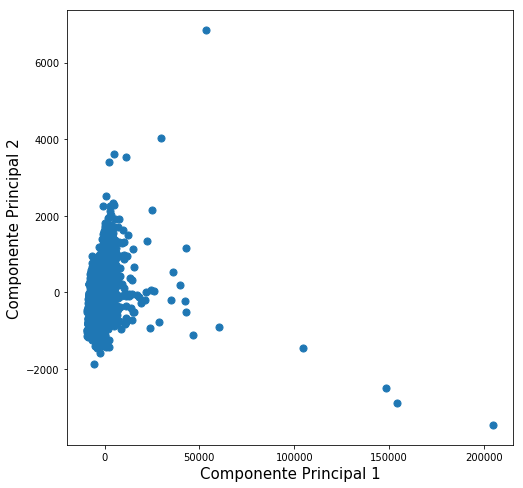

array([[-2065.54233816,    18.44190694,  -285.14239247, ...,
           47.71125269,    13.70566635,  -108.70890464],
       [ -912.04038374,   -10.36648785,   743.674126  , ...,
          -46.54026205,   -99.94466805,   203.60267827],
       [  734.1612148 ,    86.81447693,  -472.28799838, ...,
           62.96996985,   -36.44586442,  -110.53333988],
       ...,
       [-1458.10486703,   643.99233695, -1008.48862162, ...,
         -138.28893757,   -10.09578721,   -73.78958665],
       [ -809.87590087,  -633.73968907,   304.31548958, ...,
          846.45144957,   177.35963663,   229.71407107],
       [ -576.01479423,  -113.96182622,   702.56932242, ...,
          187.37108352,    25.18537248,   629.87696259]])

In [380]:
print("Normalizados:")
pca_view(x_st, 10) # normalizado
print("Dados originais:")
pca_view(df2, 10) # dados reais

### Aparentemente a disposição dos dados está mais para não linear do que uma apresentação linear, conforme visto anteriormente na técnica PCA, vou confirmar isso também utilizando um SVM sem kernel.

In [455]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
import sklearn
import xgboost

In [223]:
X = df2
y = df['SalePrice'].values

In [387]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, train_size=0.75, test_size=0.25)

In [388]:
svm_lin = LinearSVR(max_iter=20000, epsilon=0.1)
svm_lin.fit(X_train, y_train)
print(svm_lin.score(X_test, y_test)) 
print("R2",cross_val_score(svm_lin, X_test, y_test, cv=5, scoring='r2'))

C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7959613841548134


C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Conve

R2 [0.84614026 0.76001815 0.73613466 0.78938804 0.77255915]


## RandomForest

In [457]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
print("R2",cross_validate(rf, X, y, cv=5, scoring=('r2')))

C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8742225263569932
R2 {'fit_time': array([0.3415451 , 0.3072083 , 0.32846451, 0.35509157, 0.30675554]), 'score_time': array([0.00300121, 0.00395775, 0.00598669, 0.00498581, 0.00398707]), 'test_score': array([0.87613672, 0.81524585, 0.86450634, 0.86096639, 0.7550455 ]), 'train_score': array([0.97187473, 0.97405284, 0.97228249, 0.96880463, 0.96652033])}


## GradientBoosting

In [458]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
print(gb.score(X_test, y_test))
print("R2",cross_validate(gb, X, y, cv=5, scoring=('r2')))

0.8899348465798163
R2 {'fit_time': array([0.57074809, 0.57346964, 0.56358218, 0.54800797, 0.55659628]), 'score_time': array([0.00403023, 0.00295019, 0.00302339, 0.00296092, 0.00299311]), 'test_score': array([0.90099424, 0.83293552, 0.89732943, 0.90067975, 0.88307694]), 'train_score': array([0.96953188, 0.96968017, 0.96778834, 0.96755725, 0.96941785])}


## XGBoost

In [459]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
print(xgb.score(X_test, y_test))
print("R2",cross_validate(xgb, X, y, cv=5, scoring=('r2')))

0.8916736146440084
R2 {'fit_time': array([0.90617132, 0.87266803, 0.89603591, 0.88373208, 0.88965058]), 'score_time': array([0.00697875, 0.00698137, 0.00798059, 0.00797963, 0.00698137]), 'test_score': array([0.89985167, 0.84643754, 0.89895966, 0.9031677 , 0.88660191]), 'train_score': array([0.96628747, 0.96578418, 0.96545872, 0.96401955, 0.96712942])}


## MLP

In [460]:
mlp = MLPRegressor(hidden_layer_sizes=(200,), max_iter=1000, alpha=0.5)
mlp.fit(X_train, y_train)
print(mlp.score(X_test, y_test))
print("R2",cross_validate(mlp, X, y, cv=5, scoring=('r2')))

C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7826841884824434


C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Luis\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

R2 {'fit_time': array([14.89474702, 15.12578869, 15.02368879, 15.24971271, 16.4030714 ]), 'score_time': array([0.00498557, 0.00498796, 0.00299215, 0.00398922, 0.0039885 ]), 'test_score': array([0.78426997, 0.70276612, 0.78463953, 0.71560241, 0.52198119]), 'train_score': array([0.77842609, 0.77047132, 0.76896822, 0.76756986, 0.79140011])}


#### Até agora, as técnicas XGBoost, GB, RF e SVM linear estão apresentando uma melhor performance

A próxima abordagem é ajustar os hiper parâmetros, geralmente o comum é utilizar um técnica de GridSearch.

In [419]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [475]:
params = {
        'min_child_weight': [1, 5, 10, 20, 30],
        'gamma': [0.5, 1, 1.5, 2, 5, 10, 20, 30, 40, 50, 90, 100, 150],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 15, 50]
        }
param_comb = 5

In [482]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [483]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='r2', n_jobs=4, cv=5, random_state=1001 )

In [484]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=4,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=1001, refit=True,
          return_train_score='warn', scoring='r2', verbose=0)

In [485]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (5, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 All results:
{'mean_fit_time': array([1.38601274, 1.18024349, 1.13179383, 0.88394156, 1.00636668]), 'std_fit_time': array([0.21979799, 0.0675828 , 0.05121101, 0.04639375, 0.04563938]), 'mean_score_time': array([0.00718184, 0.00997424, 0.00916562, 0.01176867, 0.00777254]), 'std_score_time': array([0.00116251, 0.00260228, 0.00159118, 0.0076322 , 0.00075231]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dt

In [486]:
results_hp = cross_validate(random_search.best_estimator_, X, y, cv=5, scoring=('r2'))

In [487]:
results_nm = cross_validate(xgb, X, y, cv=5, scoring=('r2'))

In [488]:
print("XGB BH:", np.mean(results_hp['test_score']))
print("XGB NM:", np.mean(results_nm['test_score']))

XGB BH: 0.888869187185046
XGB NM: 0.8870036967951478


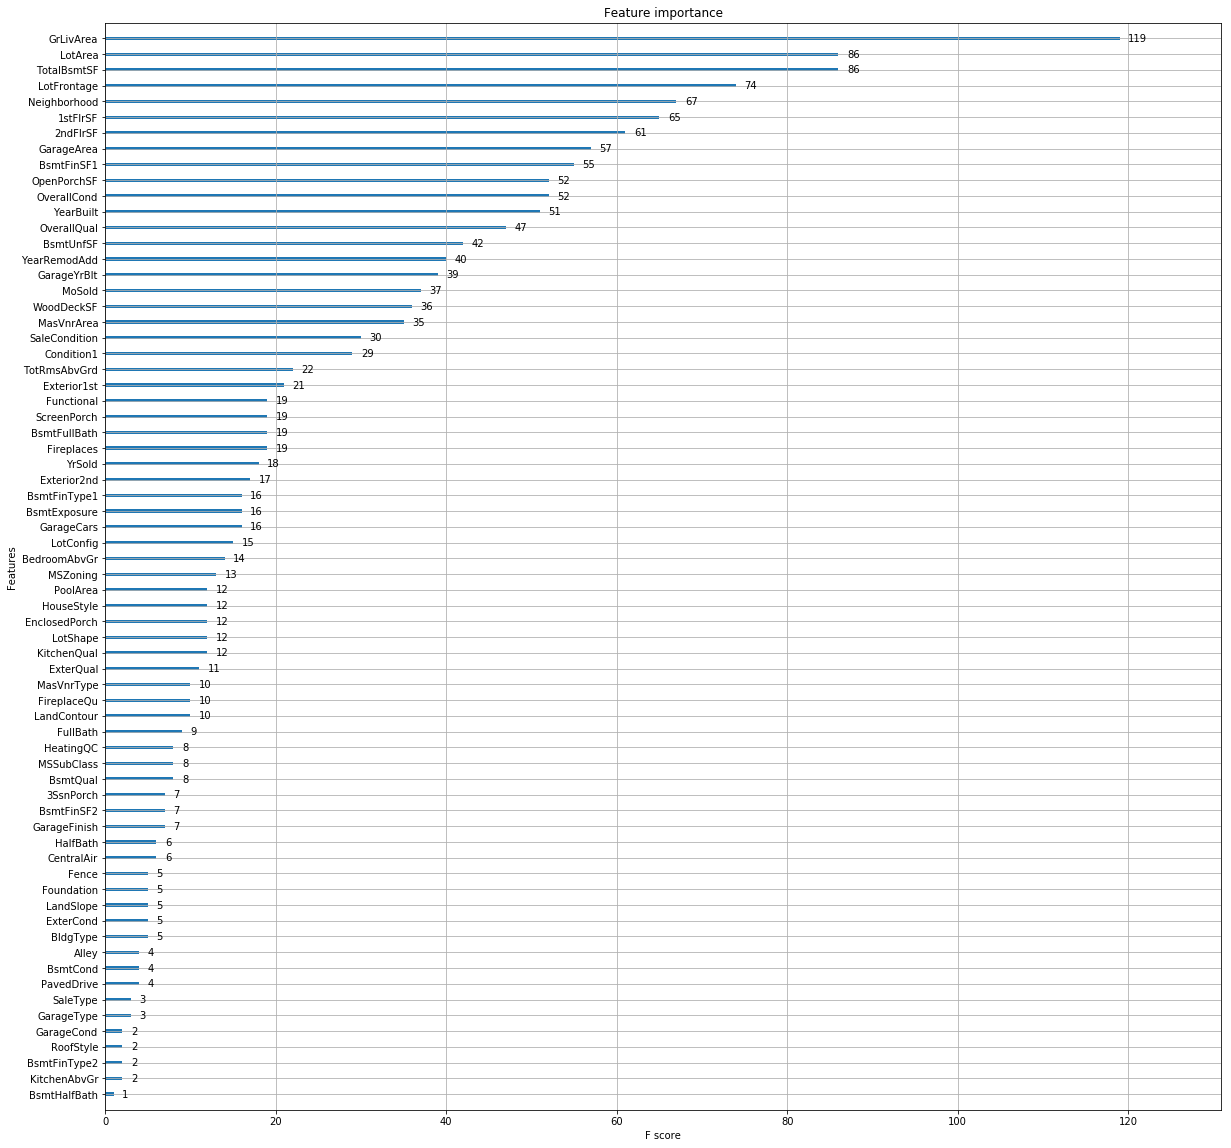

In [537]:
fig, ax = plt.subplots(figsize=(20, 20))
xgboost.plot_importance(random_search.best_estimator_, ax=ax)

In [512]:
test_df = pd.read_csv('data/test.csv')

In [513]:
test_df = pre_process(test_df)

In [514]:
test_df2 = test_df[test_df.columns.difference(['Id'])].copy()

Soma dos 3 primeiros componentes: 0.9709412847925727


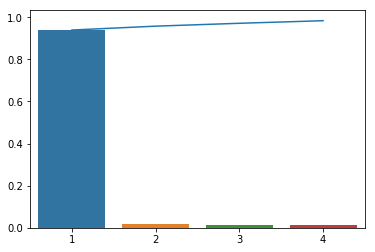

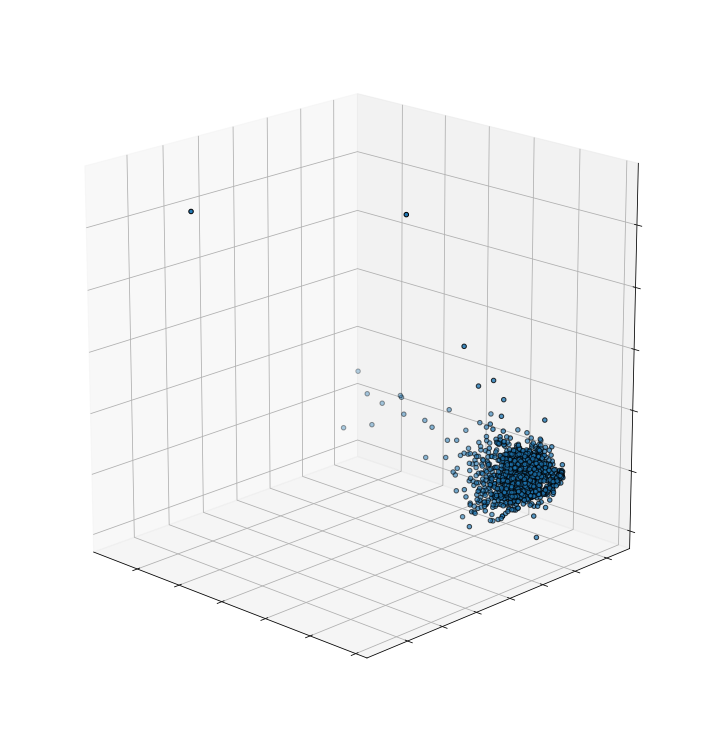

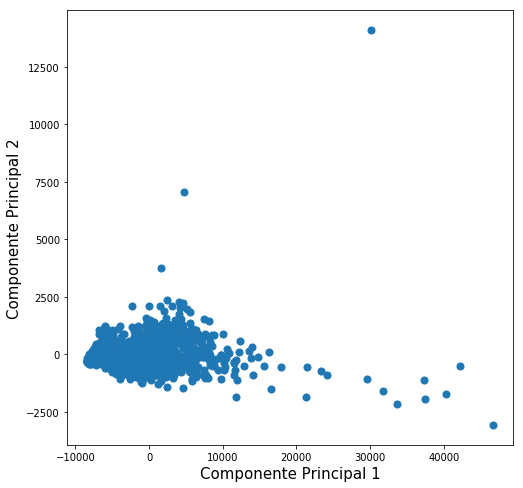

array([[ 1764.71884084,  -513.34399786,   491.40582136,  -438.79985627],
       [ 4678.03452391,  7040.27002584,  9139.07094513,  4222.1014018 ],
       [ 3997.69813322,  -295.26501091,   133.00433216,    73.07874115],
       ...,
       [10167.93390098,  -359.58757479,   495.61262873,  -857.39919357],
       [  593.85165766,   -89.0522212 ,   900.77679801,   -15.5708382 ],
       [ -175.57991038,   163.64691258,  -277.99733343,   403.13348379]])

In [515]:
pca_view(test_df2)

In [539]:
y_test = xgb.predict(test_df2)

In [540]:
results_df = pd.DataFrame(data={'Id':test_df['Id'], 'SalePrice':y_test})
results_df.to_csv('submission-xgb-01.csv', index=False)